In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean
import math


In [3]:
# read csv into dataframe
df = pd.read_csv('result.csv')

# update loss on cell if loss type is l1_loss
for index, row in df.iterrows():
    if row['CostFunc'] == 'l1_loss':
        df.at[index, 'AvgCost'] = row['AvgCost']**2

# sort dataframe based on AvgCost column in ascending order
df = df.sort_values(by='AvgCost')

# save updated dataframe as csv file
df.to_csv('result_sorted_loss.csv', index=False)

# print message indicating success
print('Updated dataframe saved to result_sorted_loss.csv')


Updated dataframe saved to result_sorted_loss.csv


In [4]:
def modified_euclidean_distance(x, y):
    distance = 0
    for i in range(0,len(x)):
        if x[i] == 0.0:
            x[i] = 1e-10
        if y[i] == 0.0:
            y[i] = 1e-10
        r = ((x[i] - y[i]) ** 2) * (max(x[i]/y[i], y[i]/x[i]) ** 2)
        distance += r

    
    return math.sqrt(distance)


def scientific_to_float(scientific_notation):
    parts = scientific_notation.split('e')
    if len(parts) == 1:
        return float(parts[0])
    else:
        a, b = parts[0], int(parts[1])
        if '.' in a:
            c = len(a) - a.index('.') - 1
            a = a.replace('.', '')
            b -= c
        if b < 0:
            return float(a) / (10 ** abs(b))
        else:
            return float(a) * (10 ** b)

In [5]:


# read csv into dataframe
df = pd.read_csv('result_sorted_loss.csv')

# define known parameters as a list
known_params = [0.01, 55, 0.1, 55, 0.125, 0.0125, 65, 4]

# calculate Euclidean distance between known parameters and BestSol1 column for each row
distances = []
for x in df['BestSol1']:
    params = list(map(scientific_to_float, x.strip('[]').split()))
    distance = modified_euclidean_distance(known_params, params) 
    distances.append(distance)

df['dist_to_known_params'] = distances

# sort dataframe based on distance to known parameters in ascending order
df = df.sort_values(by='dist_to_known_params')

# save updated dataframe as csv file
df.to_csv('result_sorted_gt.csv', index=False)

# print message indicating success
print('Updated dataframe saved to result_sorted_gt.csv')

Updated dataframe saved to result_sorted_gt.csv


In [6]:

# read CSV file
df = pd.read_csv('result_sorted_loss.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum_BestSol1 = [0] * 8

# iterate over each row in the BestSol1 column
for x in df['BestSol1']:
    # convert the scientific notation string to a list of floats
    params = list(map(scientific_to_float, x.strip('[]').split()))
    # add the values of each parameter to the running total
    for i in range(len(params)):
        param_sum_BestSol1[i] += params[i]

# divide each sum by the number of rows to get the mean
num_rows = len(df)
param_mean__BestSol1 = [x / num_rows for x in param_sum_BestSol1]

print(param_mean__BestSol1)


[0.009763887279071433, 56.68947163853572, 0.24394700260875016, 56.2736933600714, 0.10227021716750001, 0.014443066785821421, 32.429473919524995, 4.0]


In [24]:
import pandas as pd
import numpy as np

# read CSV file
df = pd.read_csv('result_sorted_loss.csv')

# initialize a list of 8 zeros to store the sum for each parameter
param_sum = [0] * 8
param_values = [[] for _ in range(8)]  # List to store values for calculating median

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for col in ['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']:
    for x in df[col]:
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # add the values of each parameter to the running total and store for calculating median
        for i in range(len(params)):
            param_sum[i] += params[i]
            param_values[i].append(params[i])

# divide each sum by the number of rows and the number of columns to get the mean
num_rows = len(df)
num_cols = 5
param_mean = [x / (num_rows * num_cols) for x in param_sum]

# calculate the median for each parameter
param_median = [np.median(values) for values in param_values]

print("mean:")
print(param_mean)
print()

print("median:")
print(param_median)


mean:
[0.00975793630027856, 56.731785277907164, 0.24688755845724988, 56.33071117279291, 0.10231505946714287, 0.014455472784885742, 32.39865540838004, 4.0]

median:
[0.00909556679, 62.0341339, 0.16312384800000002, 59.0409243, 0.0866088277, 0.0146409744, 28.30636535, 4.0]


In [ ]:
import pandas as pd
import numpy as np

# read CSV file
df = pd.read_csv('result_sorted_loss.csv')

# initialize empty NumPy arrays for each parameter
param1_arr = np.empty(len(df))
param2_arr = np.empty(len(df))
param3_arr = np.empty(len(df))
param4_arr = np.empty(len(df))
param5_arr = np.empty(len(df))
param6_arr = np.empty(len(df))
param7_arr = np.empty(len(df))
param8_arr = np.empty(len(df))

# iterate over each row in the five columns (BestSol1, BestSol2, BestSol3, BestSol4, BestSol5)
for idx, col in enumerate(['BestSol1', 'BestSol2', 'BestSol3', 'BestSol4', 'BestSol5']):
    # iterate over each row in the column
    for row_idx, x in enumerate(df[col]):
        # convert the scientific notation string to a list of floats
        params = list(map(float, x.strip('[]').split()))
        # assign each parameter to the corresponding NumPy array
        param1_arr[row_idx] = params[0]
        param2_arr[row_idx] = params[1]
        param3_arr[row_idx] = params[2]
        param4_arr[row_idx] = params[3]
        param5_arr[row_idx] = params[4]
        param6_arr[row_idx] = params[5]
        param7_arr[row_idx] = params[6]
        param8_arr[row_idx] = params[7]

arrays = [param1_arr, param2_arr, param3_arr, param4_arr, param5_arr, param6_arr, param7_arr, param8_arr]
for i in range(len(arrays)):
    arrays[i] = np.copy(arrays[i])
    arrays[i] = np.delete(arrays[i], np.where(arrays[i] < 0))

# Assign the updated arrays back to the original variables
param1_arr, param2_arr, param3_arr, param4_arr, param5_arr, param6_arr, param7_arr, param8_arr = arrays

print(param1_arr)

c:\Users\galle\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


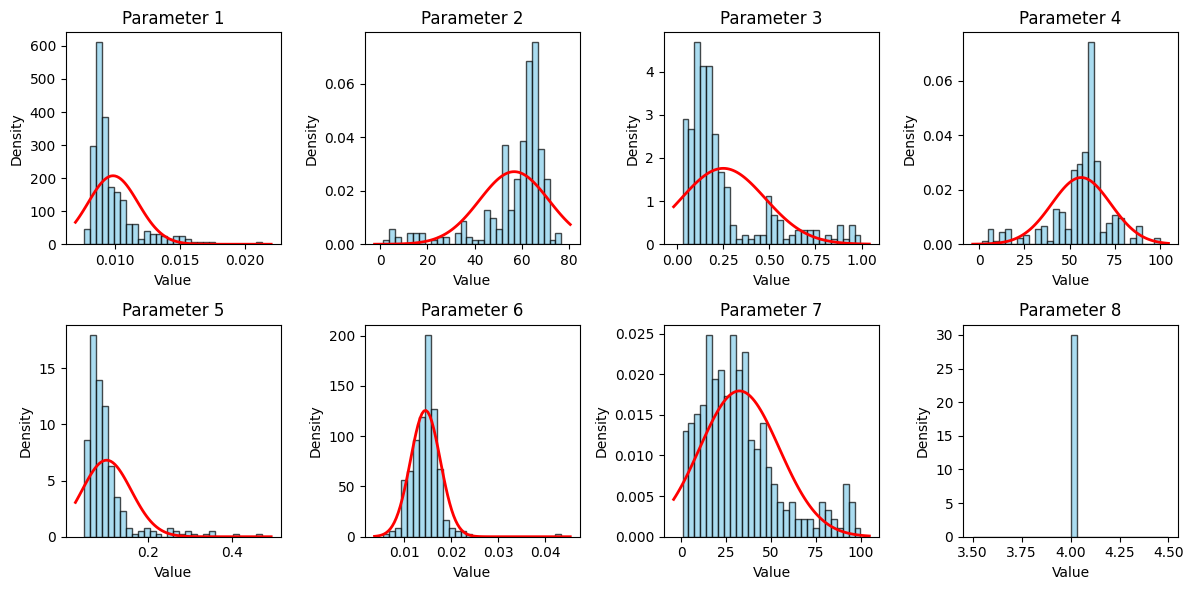

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create subplots for each parameter
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.flatten()

# Plot histograms and fitted Gaussian curves for each parameter
for i, arr in enumerate([param1_arr, param2_arr, param3_arr, param4_arr, param5_arr, param6_arr, param7_arr, param8_arr]):
    mu, std = norm.fit(arr)

    # Plot histogram
    axs[i].hist(arr, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Plot fitted Gaussian curve
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[i].plot(x, p, 'r', linewidth=2)

    # Set plot title and labels
    axs[i].set_title(f'Parameter {i+1}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()